# Library and Function Needed

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # if u want to learn regex [https://regex101.com/]
from tqdm import tqdm # A Fast, Extensible Progress Bar - Library for creating progress bars to monitor the progress of iterations or tasks.
import string
import os
import missingno as msno
import random # Random number generators - Library for generating random numbers, selecting random elements, shuffling sequences, etc.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [4]:
!pip install catboost

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics

from sklearn.metrics import (roc_curve, # Receiver Operating Characteristic (ROC) curve - A graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied.
    confusion_matrix, # Confusion matrix - A table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
    precision_score, # Precision score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total predicted positives.
    recall_score, # Recall score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total actual positives.
    f1_score, # F1 score - Harmonic mean of precision and recall, a metric for evaluating classification models.
    classification_report, # Classification report - Summary of the precision, recall, F1 score, and support for each class in a classification problem.
    accuracy_score # Accuracy score - Metric for evaluating classification models, measuring the proportion of correct predictions to the total number of predictions.
)

In [6]:
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)


def check_duplicates(dataframe):
    """
    Memeriksa nilai duplikat dari DataFrame.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Jumlah Duplikat data: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    percent = percent.round(3)  # Membulatkan persentase hingga 3 angka di belakang koma
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def basic_data_info(dataframe):
    """
    Menampilkan informasi dasar dari DataFrame.
    """
    # Menampilkan lima baris pertama DataFrame
    print("Preview Data:")
    print("---------------------------")
    display(dataframe.head())

    # Menampilkan info umum DataFrame
    print("\nInformasi Umum:")
    print("---------------------------")
    print(dataframe.info())

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print("---------------------------")
    display(dataframe.describe())

# Fetching Kaggle Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set-up Env Variable for kaggle Config

In [8]:
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis'

# # Tentukan path untuk menyimpan dataset
# path_to_save = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis/Dataset/'

# # Buat direktori jika belum ada
# os.makedirs(path_to_save, exist_ok=True)

In [9]:
# # Unduh dataset menggunakan perintah kaggle
# !kaggle datasets download -d blastchar/telco-customer-churn -p '{path_to_save}'

In [10]:
# # Ekstrak dataset
# !unzip '{path_to_save}/telco-customer-churn.zip' -d '{path_to_save}'

# # Hapus file zip jika diperlukan
# os.remove(f'{path_to_save}/telco-customer-churn.zip')

# Load Dataset

In [11]:
dataPath = '/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis/Dataset/'

df = pd.read_csv(dataPath + "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Undertanding The Data

<Axes: >

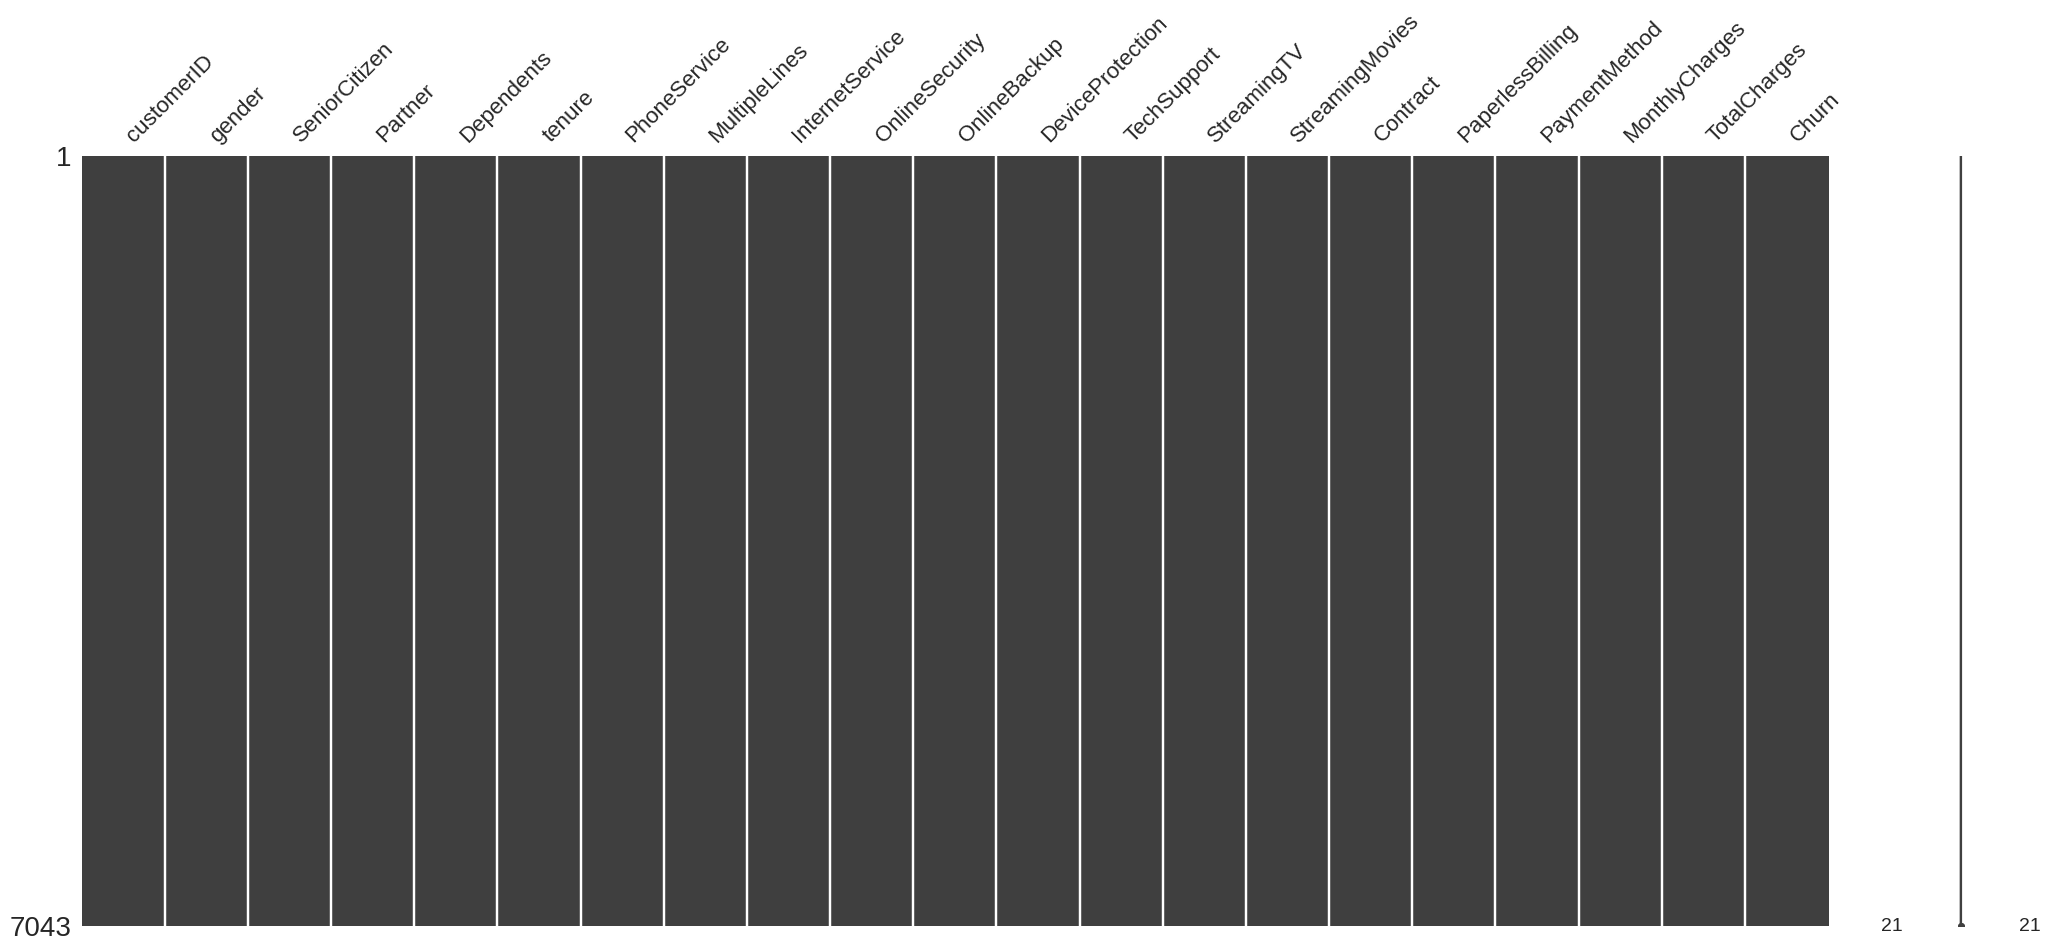

In [12]:
# Visualize missing values as a matrix
msno.matrix(df)

In [13]:
basic_data_info(df)

Preview Data:
---------------------------


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Informasi Umum:
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 1

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
missing_data(df)

,Total,Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [15]:
# Drop missing values
df.dropna(inplace=True)

In [16]:
check_duplicates(df)

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df_columns = df.columns.tolist()
for column in df_columns:
  print("\n")
  print(f"{column} unique values : {df[column].unique()}")



customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender unique values : ['Female' 'Male']


SeniorCitizen unique values : [0 1]


Partner unique values : ['Yes' 'No']


Dependents unique values : ['No' 'Yes']


tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService unique values : ['No' 'Yes']


MultipleLines unique values : ['No phone service' 'No' 'Yes']


InternetService unique values : ['DSL' 'Fiber optic' 'No']


OnlineSecurity unique values : ['No' 'Yes' 'No internet service']


OnlineBackup unique values : ['Yes' 'No' 'No internet service']


DeviceProtection unique values : ['No' 'Yes' 'No internet service']


TechSupport unique values : ['No' 'Yes' 'No internet service']


StreamingTV unique values : ['No' '

In [18]:
# Change TotalCharges to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [19]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [20]:
df.drop(columns = "customerID", inplace = True)

# A little exploration of the Data

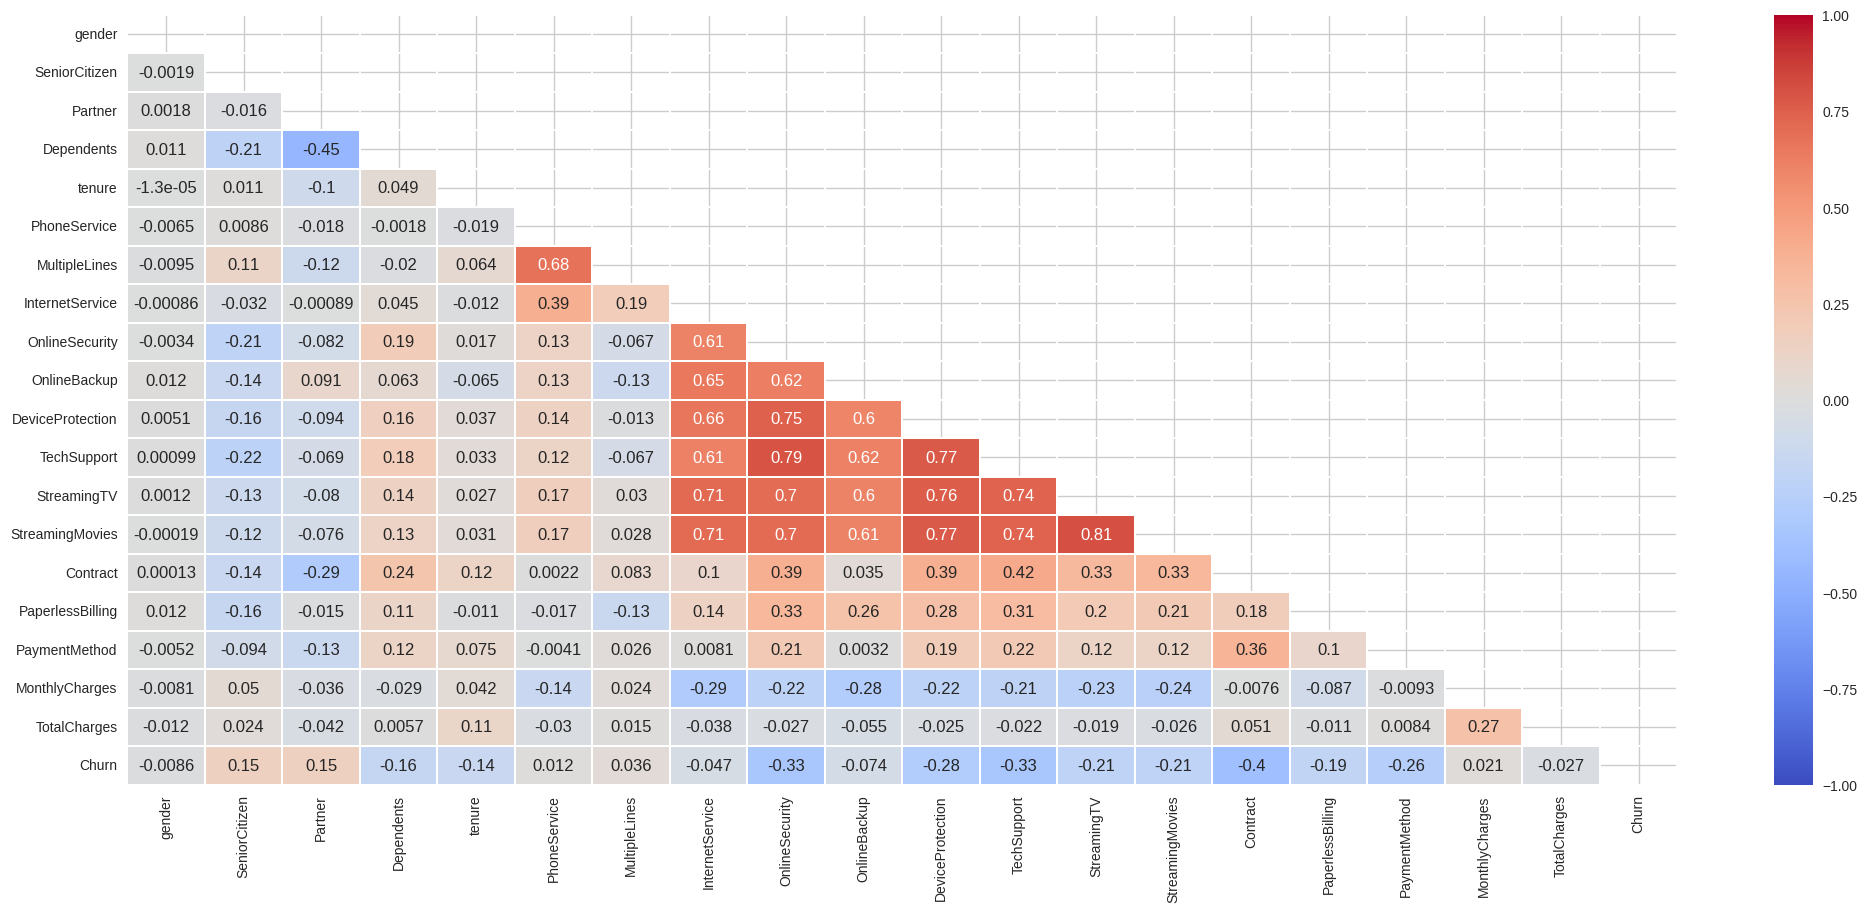

In [21]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

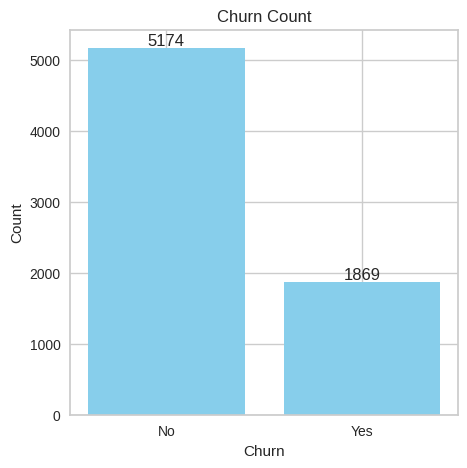

In [22]:
# Hitung jumlah kemunculan setiap nilai dalam kolom 'Churn'
counts = df['Churn'].value_counts()

# Plot batang
plt.figure(figsize=(5, 5))
bars = plt.bar(counts.index, counts.values, color='skyblue')

# Tambahkan label pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom') # Add labels

# Tambahkan label sumbu dan judul plot
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count')

# Tampilkan plot
plt.show()

# Analysis Services Each Customer

In [23]:
import math

#Make a function to plot categorical data according to target
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)

    fig = plt.figure(figsize = (12, 5*number_of_rows))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

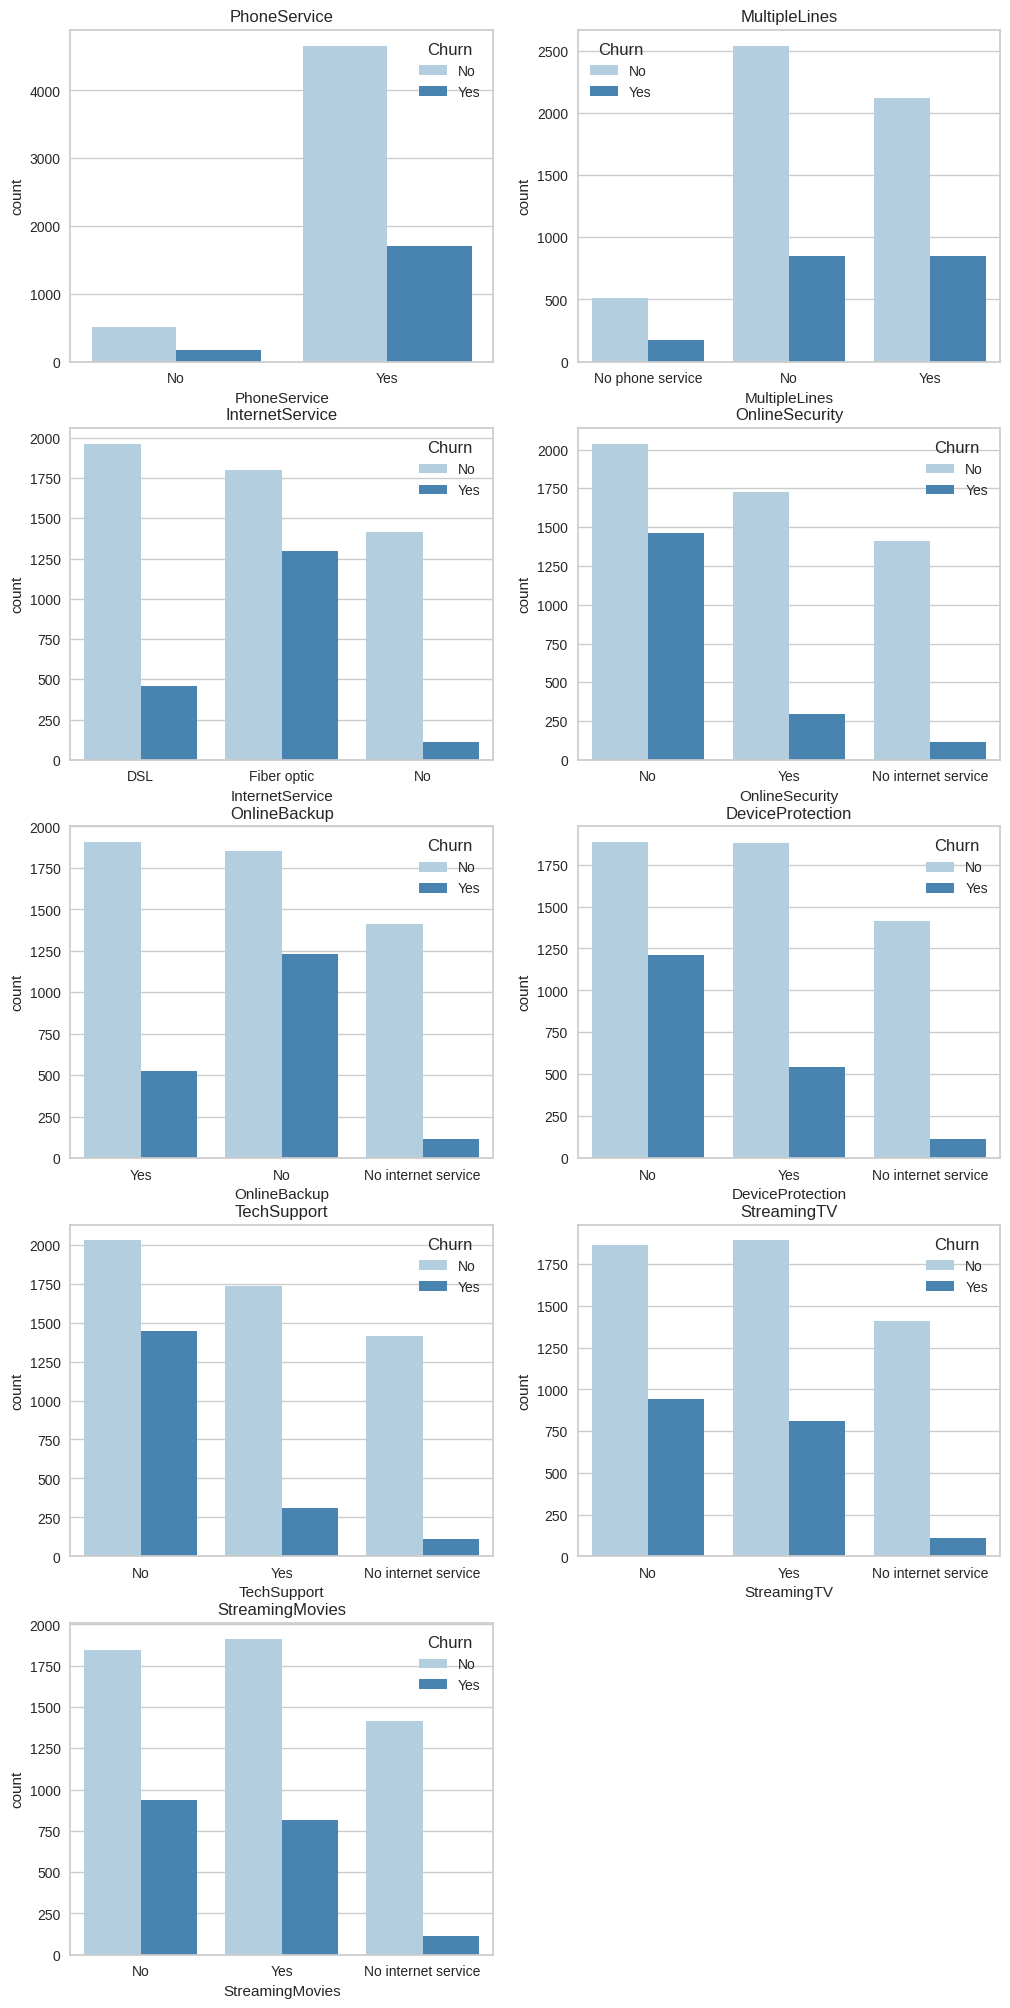

In [24]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")

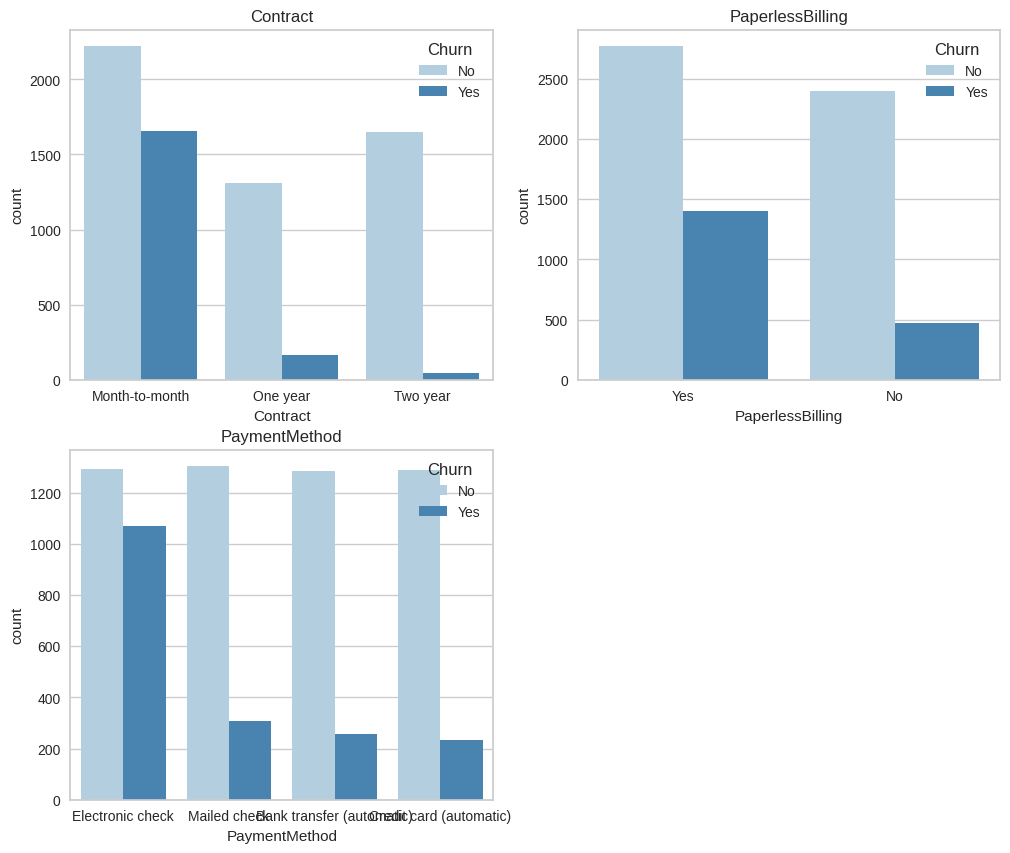

In [25]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

In [26]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

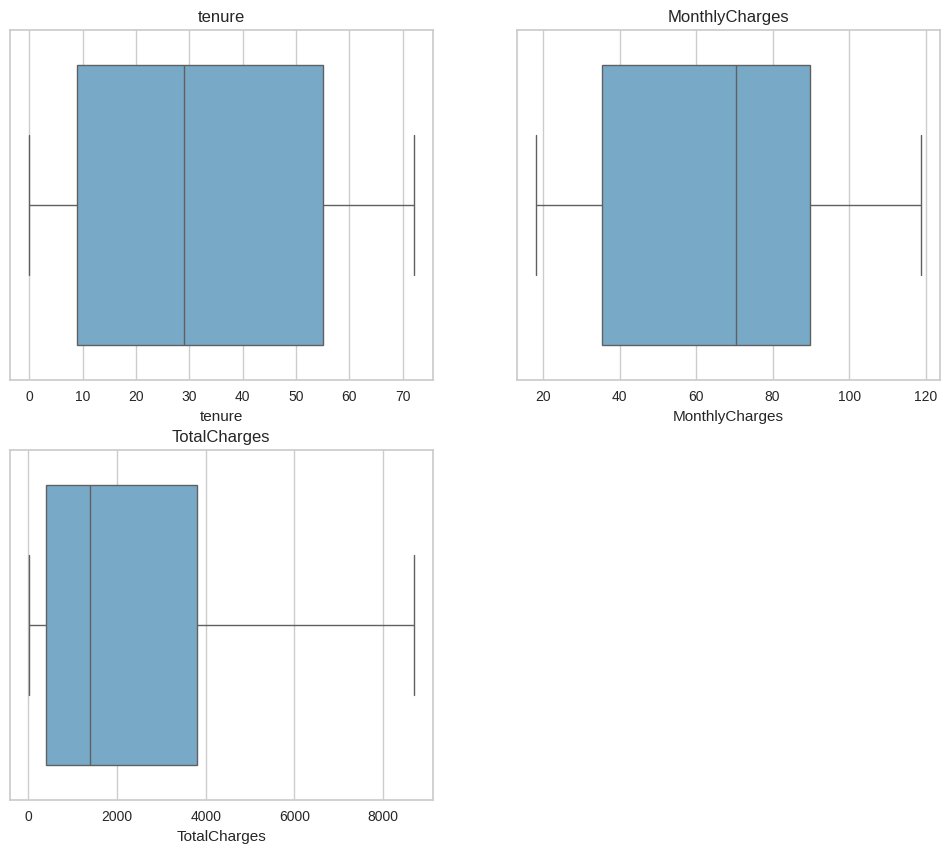

In [27]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

# Data Preparation for Modeling

## Label Encoding

In [28]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [29]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

In [30]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

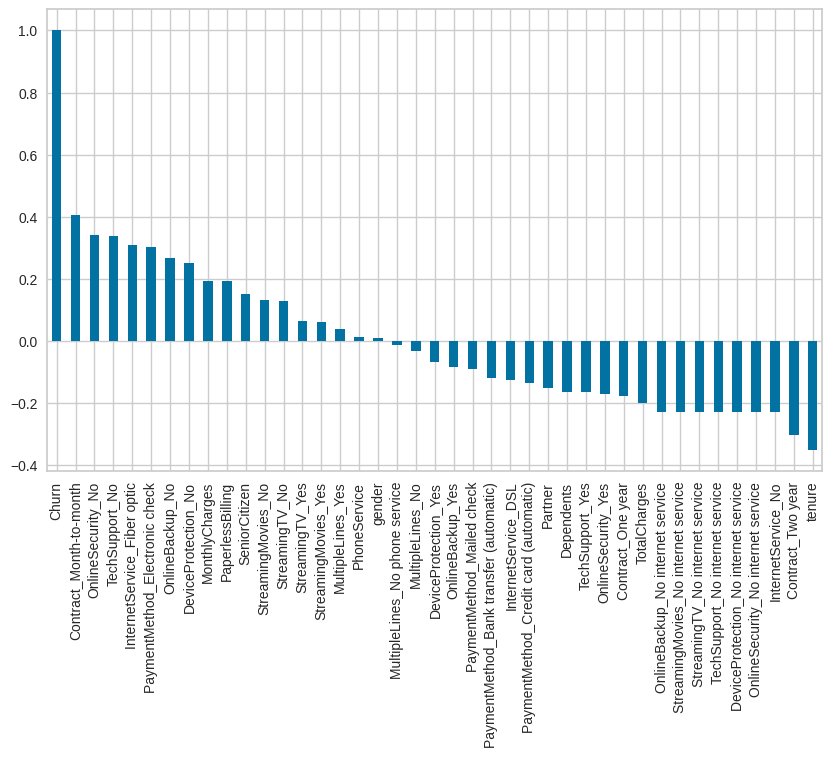

In [31]:
# Correlation Analysis

plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
# plt.savefig("correlation.png", dpi=300)
plt.show()

In [32]:
df

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.001275,1,0,1,0,0,1,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,0.472222,0.385075,0.215867,0,0,0,0,1,0,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,0.027778,0.354229,0.010310,0,0,0,0,1,1,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,0.625000,0.239303,0.210241,0,0,0,0,0,0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,0.027778,0.521891,0.015330,1,0,0,0,1,1,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0.227521,0,0,1,1,1,1,0,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
7039,1.000000,0.845274,0.847461,1,0,1,1,1,1,0,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
7040,0.152778,0.112935,0.037809,1,0,1,1,0,1,0,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
7041,0.055556,0.558706,0.033210,0,1,1,0,1,1,1,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True


# Pycaret Framework

In [33]:
# !pip install pycaret

In [34]:
from pycaret.classification import *

## Split Data to Train Test Dataset

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

# Verifikasi pembagian data
print(f'Train set: {train.shape}')
print(f'Test set: {test.shape}')

Train set: (5634, 41)
Test set: (1409, 41)


In [36]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.001275,1,0,1,0,0,1,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,0.472222,0.385075,0.215867,0,0,0,0,1,0,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,0.027778,0.354229,0.010310,0,0,0,0,1,1,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,0.625000,0.239303,0.210241,0,0,0,0,0,0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,0.027778,0.521891,0.015330,1,0,0,0,1,1,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False


## Setup Classification for Pycaret

In [37]:
from pycaret.classification import setup

# Misalkan `train` adalah DataFrame yang Anda miliki dan target kolomnya adalah 'Survived'
classification_setup = setup(
    data=train,
    target='Churn',
    remove_outliers=True,
    normalize=False,
    fix_imbalance=True,
    normalize_method='robust',
    ignore_features=None,
    verbose=True,  # Menggunakan verbose=True untuk menggantikan argumen silent
    session_id=6563
)

,Description,Value
0,Session id,6563
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5634, 41)"
4,Transformed data shape,"(7121, 41)"
5,Transformed train set shape,"(5430, 41)"
6,Transformed test set shape,"(1691, 41)"
7,Numeric features,9
8,Rows with missing values,0.1%
9,Preprocess,True


## Compare Classification from Pycaret

In [38]:
compare_models(exclude = ['lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7969,0.8347,0.6157,0.6167,0.6152,0.4774,0.4781,1.4320
catboost,CatBoost Classifier,0.7948,0.8380,0.5984,0.6163,0.6063,0.4678,0.4685,6.6040
gbc,Gradient Boosting Classifier,0.7915,0.8461,0.6787,0.5938,0.6329,0.4883,0.4909,1.1850
lr,Logistic Regression,0.7885,0.8451,0.6998,0.5848,0.6368,0.4893,0.4936,0.7820
xgboost,Extreme Gradient Boosting,0.7849,0.8207,0.5822,0.5967,0.5883,0.4430,0.4438,0.4160
ridge,Ridge Classifier,0.7839,0.8421,0.7017,0.5764,0.6324,0.4816,0.4867,0.2410
rf,Random Forest Classifier,0.7829,0.8247,0.5966,0.5899,0.5927,0.4448,0.4452,0.9760
svm,SVM - Linear Kernel,0.7824,0.8305,0.5885,0.6049,0.5801,0.4370,0.4481,0.2480
ada,Ada Boost Classifier,0.7773,0.8465,0.7361,0.5614,0.6368,0.4805,0.4898,0.4920
et,Extra Trees Classifier,0.7712,0.8001,0.5363,0.5739,0.5538,0.4004,0.4013,0.9520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6563, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [39]:
gbc_model = create_model('gbc')
catboost_model = create_model('catboost')
lightgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7975,0.8676,0.7619,0.5926,0.6667,0.5245,0.5330
1,0.7924,0.8212,0.6381,0.6036,0.6204,0.4777,0.4780
2,0.8051,0.8577,0.6952,0.6186,0.6547,0.5195,0.5213
3,0.7893,0.8580,0.6857,0.5902,0.6344,0.4876,0.4903
4,0.8122,0.8854,0.7238,0.6281,0.6726,0.5418,0.5445
5,0.7665,0.8144,0.6286,0.5546,0.5893,0.4271,0.4287
6,0.7741,0.8257,0.5962,0.5688,0.5822,0.4275,0.4277
7,0.8020,0.8324,0.6635,0.6161,0.6389,0.5028,0.5034
8,0.7766,0.8523,0.6923,0.5625,0.6207,0.4648,0.4698


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8177,0.8699,0.6762,0.6514,0.6636,0.5386,0.5388
1,0.7797,0.8085,0.5524,0.5918,0.5714,0.4235,0.4239
2,0.8025,0.8468,0.5905,0.6392,0.6139,0.4815,0.4822
3,0.7868,0.8471,0.6095,0.5981,0.6038,0.4580,0.4580
4,0.8299,0.8846,0.6952,0.6759,0.6854,0.5690,0.5691
5,0.7640,0.8077,0.5333,0.5600,0.5463,0.3869,0.3872
6,0.7817,0.8149,0.5192,0.6000,0.5567,0.4129,0.4148
7,0.7944,0.8292,0.5288,0.6322,0.5759,0.4417,0.4447
8,0.8096,0.8458,0.6731,0.6306,0.6512,0.5205,0.5210


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8177,0.8623,0.6667,0.6542,0.6604,0.5358,0.5359
1,0.7823,0.8069,0.5714,0.5941,0.5825,0.4353,0.4355
2,0.8000,0.8399,0.5714,0.6383,0.6030,0.4699,0.4712
3,0.7944,0.8445,0.6381,0.6091,0.6233,0.4820,0.4822
4,0.8350,0.8837,0.7524,0.6695,0.7085,0.5940,0.5960
5,0.7589,0.8021,0.5238,0.5500,0.5366,0.3738,0.3740
6,0.7817,0.7958,0.5385,0.5957,0.5657,0.4204,0.4213
7,0.8046,0.8272,0.5865,0.6421,0.6131,0.4827,0.4836
8,0.7995,0.8522,0.6635,0.6106,0.6359,0.4979,0.4987


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

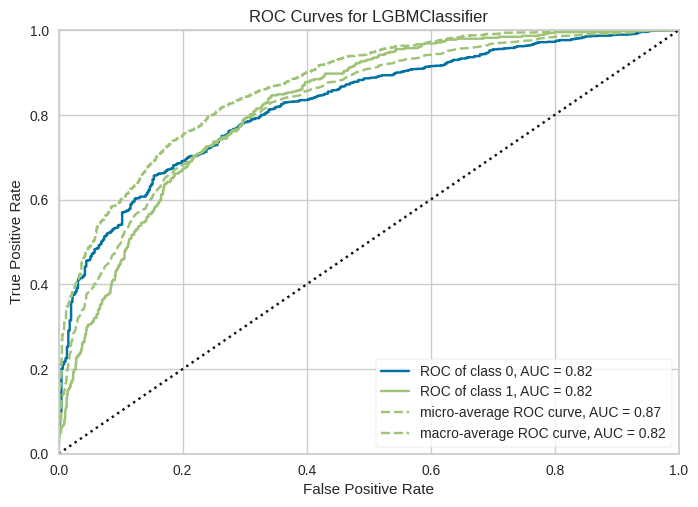

In [40]:
plot_model(estimator = lightgbm_model, plot = 'auc')

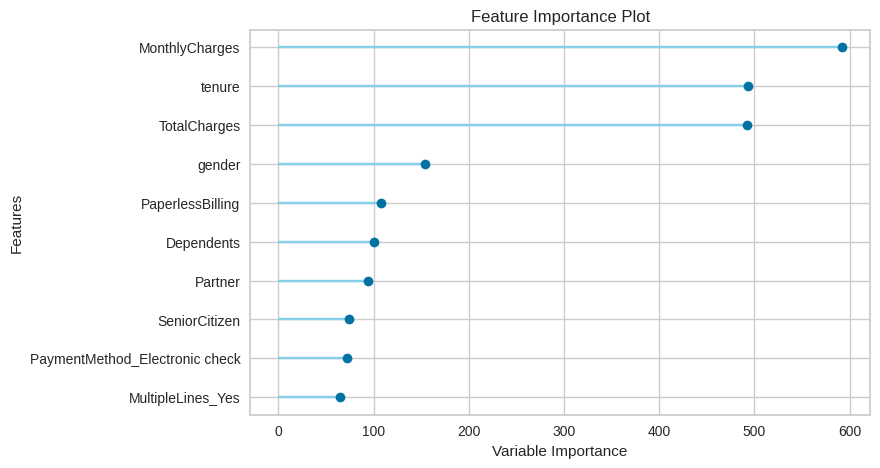

In [41]:
plot_model(estimator = lightgbm_model, plot = 'feature')

## Ensembling Method for top 3 Model

In [42]:
#blending 3 models
blend = blend_models(estimator_list=[gbc_model,lightgbm_model,catboost_model])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8051,0.8686,0.6762,0.6228,0.6484,0.5139,0.5147
1,0.7873,0.8162,0.5905,0.6019,0.5962,0.4518,0.4519
2,0.8076,0.8510,0.6095,0.6465,0.6275,0.4979,0.4983
3,0.7970,0.8532,0.6381,0.6147,0.6262,0.4869,0.4870
4,0.8325,0.8878,0.7143,0.6757,0.6944,0.5792,0.5796
5,0.7665,0.8112,0.5810,0.5596,0.5701,0.4099,0.4100
6,0.7919,0.8167,0.5673,0.6146,0.5900,0.4508,0.4515
7,0.8071,0.8329,0.5865,0.6489,0.6162,0.4878,0.4889
8,0.7995,0.8534,0.6827,0.6068,0.6425,0.5039,0.5056


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Model Evaluation

In [ ]:
# !pip install shap pycaret[analysis]

In [ ]:
# interpret_model(lightgbm_model)

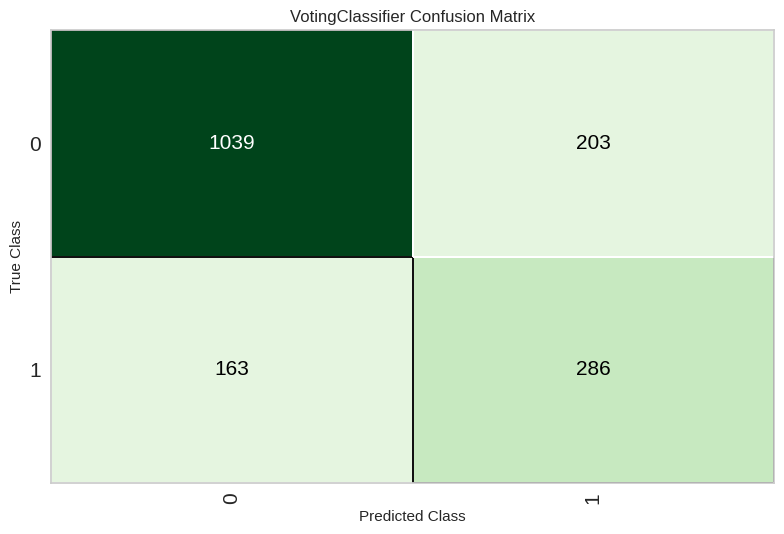

In [43]:
plot_model(estimator = blend, plot = 'confusion_matrix')

In [44]:
pred = predict_model(blend, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7906,0.8400,0.6578,0.5956,0.6252,0.4804,0.4815


In [45]:
y_pred = pred["prediction_label"]

In [46]:
y_true = test["Churn"]

In [47]:
# Generate classification report
class_report = classification_report(y_true, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.60      0.66      0.63       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409



## Saving Model

In [48]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Sertifikasi International DS Bisnis & AI Bisnis/"

In [49]:
# # Menyimpan model yang telah dituning
# save_model(blend, mainPath + 'blend_models_gbc_lightgbm_catboost')

# Train Test Split for Individual Modeling

In [50]:
X = df.drop(columns = "Churn")
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 40), (1409, 40), (5634,), (1409,))

In [51]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [52]:
y_test.value_counts()

Churn
0    1035
1     374
Name: count, dtype: int64

# LightGBM Hyperparameter Tuning

In [60]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [63]:
# Define the parameter grid for LightGBM
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the LGBMClassifier
lgbm = lgb.LGBMClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

In [64]:
import time
start = time.time()

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

stop = time.time()

duration = stop - start

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


In [65]:
print(f"Durasi Training adalah {duration/60} menit")

Durasi Training adalah 32.03976840972901 menit


In [66]:
# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test accuracy score: {test_score}")

Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 31, 'subsample': 0.6}
Best accuracy score: 0.8042220579636596
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test accuracy score: 0.801277501774308


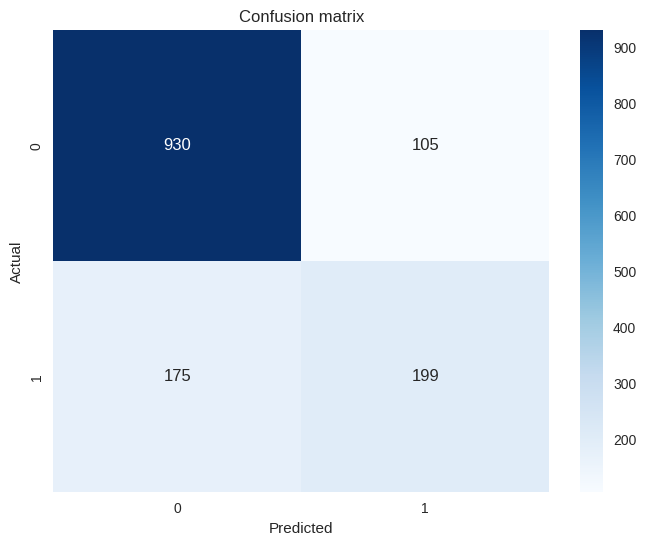

In [71]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy score: {test_accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test accuracy score: 0.801277501774308
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [70]:
# Extract the results into a DataFrame for analysis
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_num_leaves,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.19,0.01,0.01,0.00,0.60,0.01,-1,100,31,0.60,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.80,0.80,0.79,0.79,0.79,0.79,0.01,394
1,0.24,0.06,0.02,0.01,0.60,0.01,-1,100,31,0.80,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.80,0.80,0.79,0.79,0.79,0.79,0.01,394
2,0.30,0.05,0.02,0.00,0.60,0.01,-1,100,31,1.00,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.80,0.80,0.79,0.79,0.79,0.79,0.01,394
3,0.37,0.05,0.02,0.01,0.60,0.01,-1,100,50,0.60,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.80,0.80,0.79,0.79,0.78,0.79,0.01,382
4,0.38,0.06,0.02,0.00,0.60,0.01,-1,100,50,0.80,"{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.80,0.80,0.79,0.79,0.78,0.79,0.01,382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1.19,0.12,0.07,0.01,1.00,0.10,30,500,50,0.80,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.79,0.78,0.76,0.76,0.77,0.77,0.01,955
968,1.11,0.04,0.07,0.00,1.00,0.10,30,500,50,1.00,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.79,0.78,0.76,0.76,0.77,0.77,0.01,955
969,1.37,0.01,0.09,0.00,1.00,0.10,30,500,70,0.60,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.78,0.77,0.77,0.76,0.75,0.77,0.01,967
970,2.19,0.32,0.17,0.03,1.00,0.10,30,500,70,0.80,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.78,0.77,0.77,0.76,0.75,0.77,0.01,967


Refrensi :

https://www.kaggle.com/code/nareshbhat/starter-guide-to-build-nlp-ml-model-in-pycaret

https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/notebook

https://medium.com/@zulfikarirham02/telco-customer-churn-prediction-using-machine-learning-and-deep-learning-8d1905b04980